In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'10',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-01-13T04:59:32.132Z', 'error_code': 0, 'error_message': None, 'elapsed': 24, 'credit_count': 1, 'notice': None, 'total_count': 9004}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10704, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [5]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10704,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.959732e+07,1.959732e+07,False,NaN,1,None,None,None,2024-01-13T04:58:00.000Z,42812.889118,4.451146e+10,0.8936,0.476150,-6.699714,-2.467198,0.140464,17.302433,59.255231,8.390181e+11,50.0767,8.990707e+11,None,2024-01-13T04:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-12 23:00:52.724838
1,1027,Ethereum,ETH,ethereum,8235,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201812e+08,1.201812e+08,True,NaN,2,None,None,None,2024-01-13T04:58:00.000Z,2547.019599,2.473665e+10,25.2831,-0.054684,-1.742039,13.235938,13.212100,23.962134,63.812144,3.061039e+11,18.2714,3.061039e+11,None,2024-01-13T04:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-12 23:00:52.724838
2,825,Tether USDt,USDT,tether,71251,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.501084e+10,9.860296e+10,True,NaN,3,None,None,None,2024-01-13T04:57:00.000Z,0.999776,7.307431e+10,-0.3145,-0.018397,-0.004715,-0.108579,-0.058690,-0.063902,-0.025016,9.498957e+10,5.6694,9.858089e+10,None,2024-01-13T04:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-12 23:00:52.724838
3,1839,BNB,BNB,bnb,2008,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.516899e+08,1.516899e+08,False,NaN,4,None,None,None,2024-01-13T04:57:00.000Z,296.704506,1.151008e+09,-13.8920,0.240104,-4.460224,-3.362146,19.108500,22.189081,43.179890,4.500709e+10,2.6865,4.500709e+10,None,2024-01-13T04:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-12 23:00:52.724838
4,5426,Solana,SOL,solana,613,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.325493e+08,5.670617e+08,True,NaN,5,None,None,None,2024-01-13T04:58:00.000Z,91.542706,2.905905e+09,-23.9744,0.352166,-6.432108,-6.285913,30.620031,68.288741,317.458549,3.959674e+10,2.3635,5.191037e+10,None,2024-01-13T04:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-12 23:00:52.724838
5,52,XRP,XRP,xrp,1198,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.426682e+10,9.998801e+10,False,NaN,6,None,None,None,2024-01-13T04:58:00.000Z,0.572973,1.664040e+09,-14.7701,0.121543,-4.236841,0.025433,-8.115627,-13.505219,17.862802,3.109343e+10,1.8560,5.729731e+10,None,2024-01-13T04:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-12 23:00:52.724838
6,3408,USDC,USDC,usd-coin,16168,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.542959e+10,2.542959e+10,False,NaN,7,None,None,None,2024-01-13T04:58:00.000Z,1.000108,9.375957e+09,0.1838,-0.014538,0.020646,0.009370,-0.004343,0.005029,-0.009164,2.543234e+10,1.5181,2.543234e+10,None,2024-01-13T04:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-01-12 23:00:52.724838
7,2010,Cardano,ADA,cardano,1023,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.538648e+10,3.652824e+10,False,NaN,8,None,None,None,2024-01-13T04:57:00.000Z,0.546334,6.829974e+08,-31.8677,0.074058,-5.740690,2.900270,-16.229104,51.841106,120.998800,1.933284e+10,1.1539,2.458503e+10,None,2024-01-13T04:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-12 23:00:52.724838
8,5805,Avalanche,AVAX,avalanche,636,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-

In [7]:
def api_runner():   
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'10',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    #df_append = pd.DataFrame(df2)
    #df = pd.concat([df,df_append])
    
    if not os.path.isfile(r'/Users/celestandrade/Desktop/cryptocsv/testapi.csv'):
        df.to_csv(r'/Users/celestandrade/Desktop/cryptocsv/testapi.csv', header='column_names')
    else:
          df.to_csv(r'/Users/celestandrade/Desktop/cryptocsv/testapi.csv', mode='a', header=False)  
    

In [8]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API runner completed')
    sleep(60)
exit()

API runner completed
API runner completed
API runner completed


KeyboardInterrupt: 

In [9]:
df = pd.read_csv(r'/Users/celestandrade/Desktop/cryptocsv/testapi.csv')
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10704,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.959732e+07,1.959732e+07,False,NaN,1,NaN,NaN,NaN,2024-01-13T05:01:00.000Z,42787.272112,4.448371e+10,0.8247,0.446230,-6.850667,-2.538334,0.136084,17.159691,59.155510,8.385161e+11,50.0468,8.985327e+11,NaN,2024-01-13T05:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-12 23:02:16.901998
1,1,1027,Ethereum,ETH,ethereum,8235,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.201812e+08,1.201812e+08,True,NaN,2,NaN,NaN,NaN,2024-01-13T05:01:00.000Z,2544.087607,2.473077e+10,25.5601,-0.078879,-1.891805,13.075700,13.105717,23.753235,63.613010,3.057515e+11,18.2503,3.057515e+11,NaN,2024-01-13T05:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-12 23:02:16.901998
2,2,825,Tether USDt,USDT,tether,71251,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,9.501084e+10,9.860296e+10,True,NaN,3,NaN,NaN,NaN,2024-01-13T05:00:00.000Z,0.999856,7.307197e+10,-0.2998,-0.001278,-0.011040,-0.117180,-0.042091,-0.058867,-0.021474,9.499714e+10,5.6699,9.858875e+10,NaN,2024-01-13T05:00:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-12 23:02:16.901998
3,3,1839,BNB,BNB,bnb,2008,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.516899e+08,1.516899e+08,False,NaN,4,NaN,NaN,NaN,2024-01-13T05:00:00.000Z,296.757145,1.149743e+09,-14.0875,0.265340,-4.494221,-3.312394,19.178739,22.191652,43.226110,4.501508e+10,2.6870,4.501508e+10,NaN,2024-01-13T05:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-12 23:02:16.901998
4,4,5426,Solana,SOL,solana,613,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.325493e+08,5.670617e+08,True,NaN,5,NaN,NaN,NaN,2024-01-13T05:01:00.000Z,91.569033,2.899847e+09,-24.0313,0.537224,-6.433790,-6.108010,30.849567,68.540755,317.508653,3.960813e+10,2.3642,5.192530e+10,NaN,2024-01-13T05:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-12 23:02:16.901998
5,5,52,XRP,XRP,xrp,1198,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.426682e+10,9.998801e+10,False,NaN,6,NaN,NaN,NaN,2024-01-13T05:01:00.000Z,0.573064,1.660734e+09,-14.7870,0.193119,-4.232728,0.110735,-8.071412,-13.513504,17.864235,3.109838e+10,1.8563,5.730643e+10,NaN,2024-01-13T05:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-12 23:02:16.901998
6,6,3408,USDC,USDC,usd-coin,16168,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.542959e+10,2.542959e+10,False,NaN,7,NaN,NaN,NaN,2024-01-13T05:01:00.000Z,1.000169,9.375093e+09,0.1463,-0.001763,0.024020,0.004544,0.001444,0.014295,0.002033,2.543388e+10,1.5181,2.543388e+10,NaN,2024-01-13T05:01:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-01-12 23:02:16.901998
7,7,2010,Cardano,ADA,cardano,1023,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.538648e+10,3.652824e+10,False,NaN,8,NaN,NaN,NaN,2024-01-13T05:00:00.000Z,0.546547,6.828025e+08,-31.8965,0.178915,-5.755720,3.007755,-16.111879,51.899061,121.012453,1.934039e+10,1.1543,2.459464e+10,NaN,2024-01-13T05:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-12 23:02:16.901998
8,8,5805,Avalanche,AVAX,avalanche,636,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-

In [10]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [11]:
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10704,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19597325.00000,19597325.00000,False,NaN,1,NaN,NaN,NaN,2024-01-13T05:01:00.000Z,42787.27211,44483712896.94790,0.82470,0.44623,-6.85067,-2.53833,0.13608,17.15969,59.15551,838516077433.26965,50.04680,898532714342.31995,NaN,2024-01-13T05:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-12 23:02:16.901998
1,1,1027,Ethereum,ETH,ethereum,8235,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120181204.34119,120181204.34119,True,NaN,2,NaN,NaN,NaN,2024-01-13T05:01:00.000Z,2544.08761,24730768704.88538,25.56010,-0.07888,-1.89180,13.07570,13.10572,23.75323,63.61301,305751512569.58502,18.25030,305751512569.59003,NaN,2024-01-13T05:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-12 23:02:16.901998
2,2,825,Tether USDt,USDT,tether,71251,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,95010835101.64194,98602960963.43436,True,NaN,3,NaN,NaN,NaN,2024-01-13T05:00:00.000Z,0.99986,73071966530.97952,-0.29980,-0.00128,-0.01104,-0.11718,-0.04209,-0.05887,-0.02147,94997137615.33205,5.66990,98588745608.88000,NaN,2024-01-13T05:00:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-12 23:02:16.901998
3,3,1839,BNB,BNB,bnb,2008,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,151689947.97334,151689947.97334,False,NaN,4,NaN,NaN,NaN,2024-01-13T05:00:00.000Z,296.75715,1149742551.37821,-14.08750,0.26534,-4.49422,-3.31239,19.17874,22.19165,43.22611,45015075910.31715,2.68700,45015075910.32000,NaN,2024-01-13T05:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-12 23:02:16.901998
4,4,5426,Solana,SOL,solana,613,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,432549345.38173,567061747.55682,True,NaN,5,NaN,NaN,NaN,2024-01-13T05:01:00.000Z,91.56903,2899846685.48612,-24.03130,0.53722,-6.43379,-6.10801,30.84957,68.54075,317.50865,39608125109.49754,2.36420,51925295649.72000,NaN,2024-01-13T05:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-12 23:02:16.901998
5,5,52,XRP,XRP,xrp,1198,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,54266821529.00000,99988013070.00000,False,NaN,6,NaN,NaN,NaN,2024-01-13T05:01:00.000Z,0.57306,1660734375.64699,-14.78700,0.19312,-4.23273,0.11074,-8.07141,-13.51350,17.86423,31098379283.64786,1.85630,57306432194.54000,NaN,2024-01-13T05:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-12 23:02:16.901998
6,6,3408,USDC,USDC,usd-coin,16168,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,25429589670.24212,25429589670.24212,False,NaN,7,NaN,NaN,NaN,2024-01-13T05:01:00.000Z,1.00017,9375093241.68921,0.14630,-0.00176,0.02402,0.00454,0.00144,0.01430,0.00203,25433880609.95923,1.51810,25433880609.96000,NaN,2024-01-13T05:01:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-01-12 23:02:16.901998
7,7,2010,Cardano,ADA,cardano,1023,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35386482153.65000,36528237975.52500,False,NaN,8,NaN,NaN,NaN,2024-01-13T05:00:00.000Z,0.54655,682802483.45063,-31.89650,0.17892,-5.75572,3.00775,-16.11188,51.89906,121.01245,19340392620.48965,1.15430,24594636566.11000,NaN,2024-01-13

In [12]:
df = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.47676,-6.81015,-2.50055,0.17737,17.18506,59.21085
Ethereum,-0.02274,-1.81949,13.12767,13.13949,23.79776,63.69404
Tether USDt,-0.00236,-0.01137,-0.10811,-0.04162,-0.04600,-0.01740
BNB,0.26012,-4.50829,-3.29134,19.18437,22.15228,43.21142
Solana,0.57688,-6.44238,-6.09058,30.88661,68.57316,317.63043
XRP,0.20718,-4.23370,0.11844,-8.06317,-13.50120,17.87529
USDC,0.00043,0.01956,0.01271,0.00719,0.01699,0.00698
Cardano,0.18023,-5.79572,3.06183,-16.00007,51.90559,120.97896
Avalanche,0.37060,-8.06284,0.75754,-7.64158,111.46167,288.40956


In [13]:
df = df.stack()
df

name                                     
Bitcoin      quote.USD.percent_change_1h      0.47676
             quote.USD.percent_change_24h    -6.81015
             quote.USD.percent_change_7d     -2.50055
             quote.USD.percent_change_30d     0.17737
             quote.USD.percent_change_60d    17.18506
             quote.USD.percent_change_90d    59.21085
Ethereum     quote.USD.percent_change_1h     -0.02274
             quote.USD.percent_change_24h    -1.81949
             quote.USD.percent_change_7d     13.12767
             quote.USD.percent_change_30d    13.13949
             quote.USD.percent_change_60d    23.79776
             quote.USD.percent_change_90d    63.69404
Tether USDt  quote.USD.percent_change_1h     -0.00236
             quote.USD.percent_change_24h    -0.01137
             quote.USD.percent_change_7d     -0.10811
             quote.USD.percent_change_30d    -0.04162
             quote.USD.percent_change_60d    -0.04600
             quote.USD.percent_change_90

In [14]:
type(df)

pandas.core.series.Series

In [15]:
df = df.to_frame(name='values')
df

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.47676
            quote.USD.percent_change_24h  -6.81015
            quote.USD.percent_change_7d   -2.50055
            quote.USD.percent_change_30d   0.17737
            quote.USD.percent_change_60d  17.18506
            quote.USD.percent_change_90d  59.21085
Ethereum    quote.USD.percent_change_1h   -0.02274
            quote.USD.percent_change_24h  -1.81949
            quote.USD.percent_change_7d   13.12767
            quote.USD.percent_change_30d  13.13949
            quote.USD.percent_change_60d  23.79776
            quote.USD.percent_change_90d  63.69404
Tether USDt quote.USD.percent_change_1h   -0.00236
            quote.USD.percent_change_24h  -0.01137
            quote.USD.percent_change_7d   -0.10811
            quote.USD.percent_change_30d  -0.04162
            quote.USD.percent_change_60d  -0.04600
            quote.USD.percent_change_90d  -0.01740
BNB         quote.USD.percent_change_1h    0.26012
            quote.USD.percent_change_24h  -4.50829
            quote.USD.percent_change_7d   -3.29134
            quote.USD.percent_change_30d  19.18437
            quote.USD.percent_change_60d  22.15228
            quote.USD.percent_change_90d  43.21142
Solana      quote.USD.percent_change_1h    0.57688
            quote.USD.percent_change_24h  -6.44238
            quote.USD.percent_change_7d   -6.09058
            quote.USD.percent_change_30d  30.88661
            quote.USD.percent_change_60d  68.57316
            quote.USD.percent_change_90d 317.63043
XRP         quote.USD.percent_change_1h    0.20718
            quote.USD.percent_change_24h  -4.23370
            quote.USD.percent_change_7d    0.11844
            quote.USD.percent_change_30d  -8.06317
            quote.USD.percent_change_60d -13.50120
            quote.USD.percent_change_90d  17.87529
USDC        quote.USD.percent_change_1h    0.00043
            quote.USD.percent_change_24h   0.01956
            quote.USD.percent_change_7d    0.01271
            quote.USD.percent_change_30d   0.00719
            quote.USD.percent_change_60d   0.01699
            quote.USD.percent_change_90d   0.00698
Cardano     quote.USD.percent_change_1h    0.18023
            quote.USD.percent_change_24h  -5.79572
            quote.USD.percent_change_7d    3.06183
            quote.USD.percent_change_30d -16.00007
            quote.USD.percent_change_60d  51.90559
            quote.USD.percent_change_90d 120.97896
Avalanche   quote.USD.percent_change_1h    0.37060
            quote.USD.percent_change_24h  -8.06284
            quote.USD.percent_change_7d    0.75754
            quote.USD.percent_change_30d  -7.64158
            quote.USD.percent_change_60d 111.46167
            quote.USD.percent_change_90d 288.40956
Dogecoin    quote.USD.percent_change_1h    0.44309
            quote.USD.percent_change_24h  -3.83480
            quote.USD.percent_change_7d   -1.52722
            quote.USD.percent_change_30d -15.58706
            quote.USD.percent_change_60d   7.47401
            quote.USD.percent_change_90d  35.32503

In [16]:
type(df)

pandas.core.frame.DataFrame

In [17]:
df.count()

values    60
dtype: int64

In [18]:
df = df.reset_index()
df

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.47676
1,Bitcoin,quote.USD.percent_change_24h,-6.81015
2,Bitcoin,quote.USD.percent_change_7d,-2.50055
3,Bitcoin,quote.USD.percent_change_30d,0.17737
4,Bitcoin,quote.USD.percent_change_60d,17.18506
5,Bitcoin,quote.USD.percent_change_90d,59.21085
6,Ethereum,quote.USD.percent_change_1h,-0.02274
7,Ethereum,quote.USD.percent_change_24h,-1.81949
8,Ethereum,quote.USD.percent_change_7d,13.12767
9,Ethereum,quote.USD.percent_change_30d,13.13949


In [19]:
df = df.rename(columns={'level_1': 'percent_change'})
df

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.47676
1,Bitcoin,quote.USD.percent_change_24h,-6.81015
2,Bitcoin,quote.USD.percent_change_7d,-2.50055
3,Bitcoin,quote.USD.percent_change_30d,0.17737
4,Bitcoin,quote.USD.percent_change_60d,17.18506
5,Bitcoin,quote.USD.percent_change_90d,59.21085
6,Ethereum,quote.USD.percent_change_1h,-0.02274
7,Ethereum,quote.USD.percent_change_24h,-1.81949
8,Ethereum,quote.USD.percent_change_7d,13.12767
9,Ethereum,quote.USD.percent_change_30d,13.13949


In [20]:
df['percent_change'] = df['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df

,name,percent_change,values
0,Bitcoin,1h,0.47676
1,Bitcoin,24h,-6.81015
2,Bitcoin,7d,-2.50055
3,Bitcoin,30d,0.17737
4,Bitcoin,60d,17.18506
5,Bitcoin,90d,59.21085
6,Ethereum,1h,-0.02274
7,Ethereum,24h,-1.81949
8,Ethereum,7d,13.12767
9,Ethereum,30d,13.13949


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

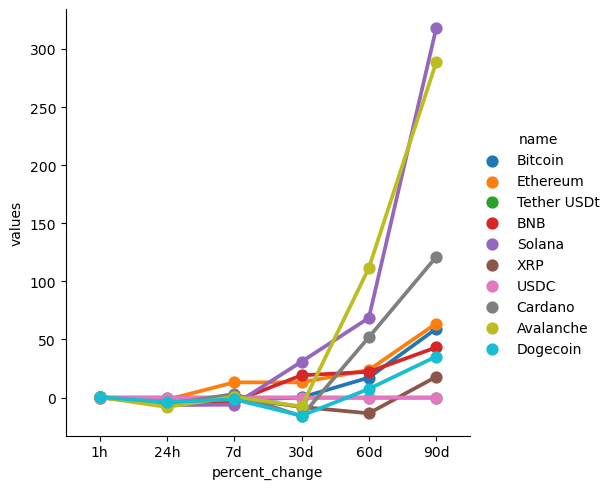

In [22]:
sns.catplot(x='percent_change', y='values', hue='name', data=df, kind='point')